# Data Exploration 1: Statistical Analyses
* Statistics are at the heart of data exploration, so first an overview of statistical analyses to run with minimal visualization

In [3]:
# imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
# Neat way to output all -- only for this cell
from IPython.core.interactiveshell import InteractiveShell
print('default InteractiveShell.ast_node_interactivity: last_expr')
InteractiveShell.ast_node_interactivity = "all"

default InteractiveShell.ast_node_interactivity: last_expr


In [4]:
# getting data
vg_df = pd.read_csv('vgsales.csv')
vg_df.axes

[RangeIndex(start=0, stop=16598, step=1),
 Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
        'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
       dtype='object')]

## Variable Identification
* Variables Record ID up to Sales are the **Predictor (input)**
  * The rank is related to sales -- but how related? This is something that we will examine later on. This 
### Information about variables
* Variables After Flight Impact are the **Target (output)**
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.


In [5]:
vg_df.head()
vg_df.tail()
vg_df.describe()
vg_df.isnull().sum()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Univariate Analysis - Continuous
* Examine the variable across the samples
* two types of variables: continuous and categorical

* Central tendency (can be given by a pandas describe method on each)
  * Mean 
  * Median 
  * Mode
  * Min
  * Max
* Measure of Dispersion: 
  * Range
  * Quartile values
  * Interquartile Range (spread between Q1 and Q3)
  * Standard deviation (sq. root of the sum of squared residuals divided by number of items minus 1)
  * Variance (just standard dev without the sq. root)
  * Index of Dispersion (variance divided by mean to account for )
  * 
* Skewness / Kurtosis / Comparing to Distributions 
  * Skewness is measure of asymmetry (generally poor indicator)
  * Kurtosis - how big tails are (generally poor indicator)
    * Mesokurtic - normal
    * Platykurtic - less kurtosis
    * Leptokurtic - greater kurtosis
  * Graphing against normal Distribution

In [6]:
# show all cols on df
from IPython.display import display

# The default
pd.options.display.max_columns = 20

with pd.option_context("display.max_columns", None):
    # Central tendencies
    vg_df.describe()
    iqr_series = vg_df[:100].describe().loc['75%'] - vg_df[:100].describe().loc['25%']
    print('\nInterquartile range\n--')
    print(iqr_series)


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000



Interquartile range
--
Rank            49.5000
Year            10.0000
NA_Sales         4.4275
EU_Sales         2.7275
JP_Sales         3.0450
Other_Sales      1.0700
Global_Sales     6.9500
dtype: float64


### Central Tendency
Interesting from a cursory overview of data
* The mean and median year of the full dataset is about 2006-7. The mean and median of the top games is very similar. This indicates that the data with years 2000-2020 are by far dominant.
* Years start at 1980-2020
* Standard deviation for years is 5 years. 2 standard deviations = 95%, so 95 percent of video games lie between 1996 and 2016.
* The mean game sales is >> than the median, indicating that the best performers are buoying the total heavily 

Rank


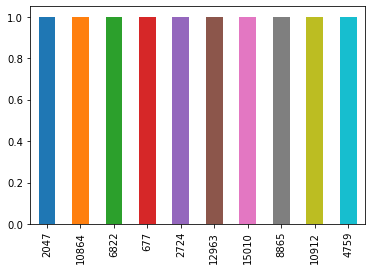

Name


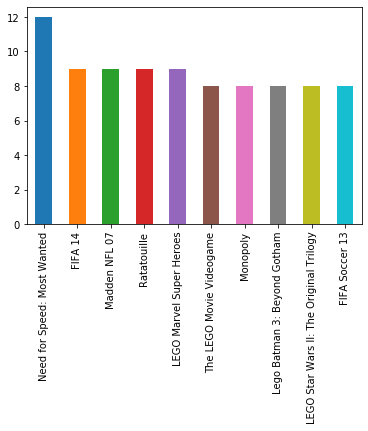

Platform


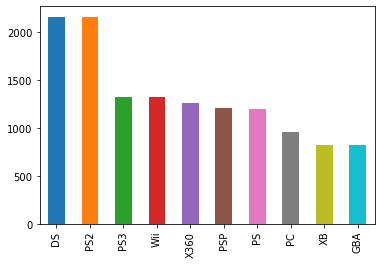

Year


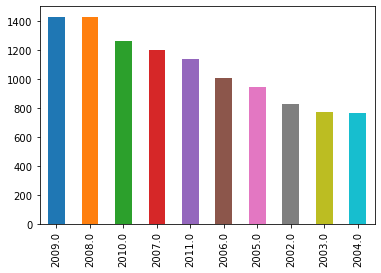

Genre


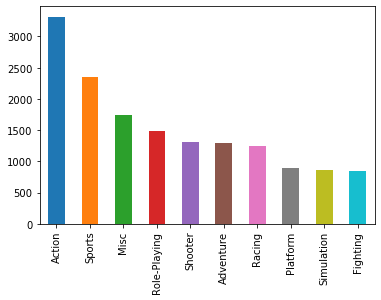

Publisher


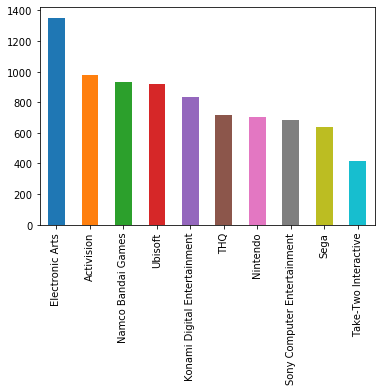

NA_Sales


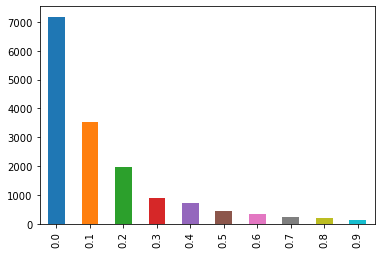

EU_Sales


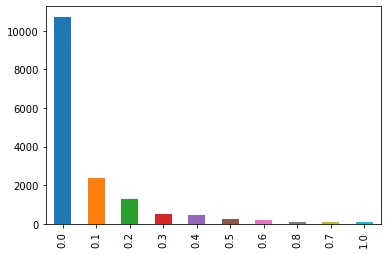

JP_Sales


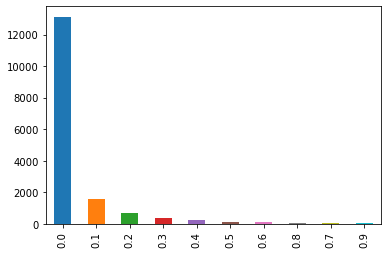

Other_Sales


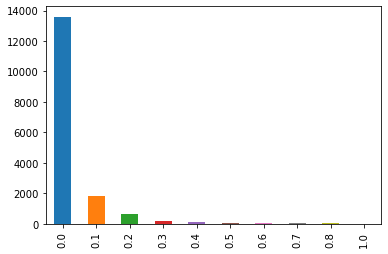

Global_Sales


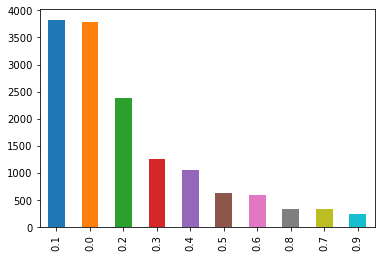

In [7]:
# For all videogames
for col in vg_df.columns:
    print(col)
    rounded_df = vg_df.round(decimals=1)
    rounded_df[col].value_counts().head(10).plot.bar()
    plt.show()

Rank


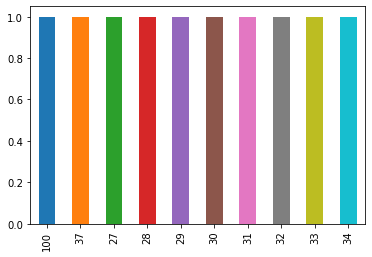

Name


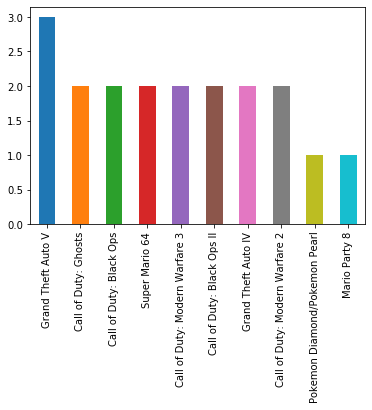

Platform


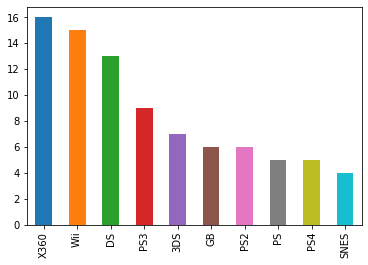

Year


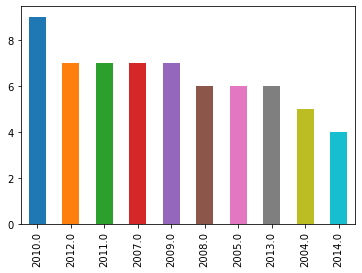

Genre


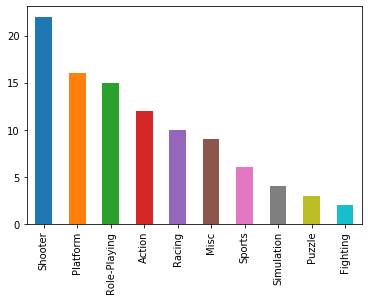

Publisher


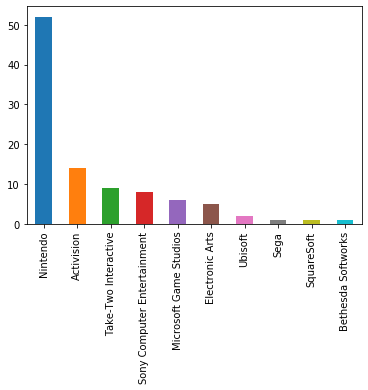

NA_Sales


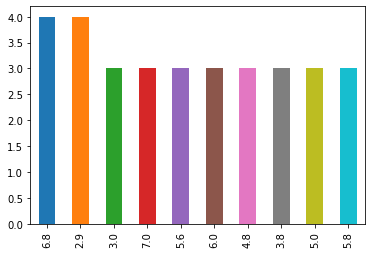

EU_Sales


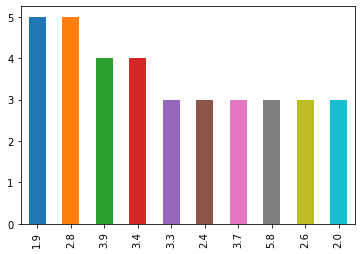

JP_Sales


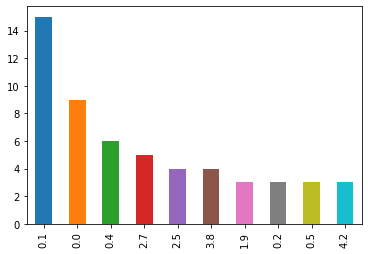

Other_Sales


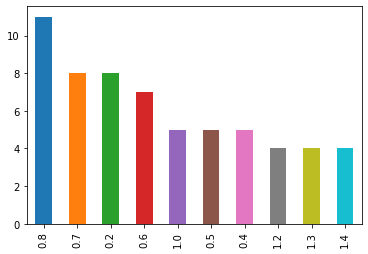

Global_Sales


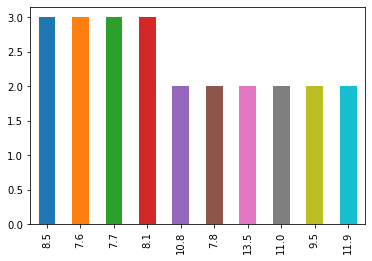

In [8]:
# For all videogames
for col in vg_df.columns:
    print(col)
    rounded_df = vg_df.round(decimals=1)
    rounded_df[col].head(100).value_counts().head(10).plot.bar()
    plt.show()

In [9]:
print('Skew\n---')
print(vg_df.skew(), '\n')

print('Kurtosis\n---')
print(vg_df.kurtosis())

Skew
---
Rank             0.000066
Year            -1.002560
NA_Sales        18.799627
EU_Sales        18.875535
JP_Sales        11.206458
Other_Sales     24.233923
Global_Sales    17.400645
dtype: float64 

Kurtosis
---
Rank              -1.199865
Year               1.848181
NA_Sales         649.130268
EU_Sales         756.027796
JP_Sales         194.233994
Other_Sales     1025.348145
Global_Sales     603.932346
dtype: float64



Year
---


<BarContainer object of 39 artists>

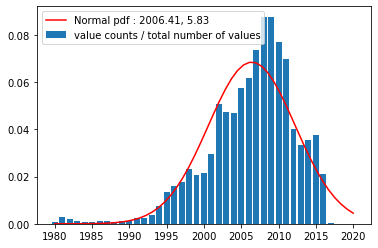


NA_Sales
---


<BarContainer object of 20 artists>

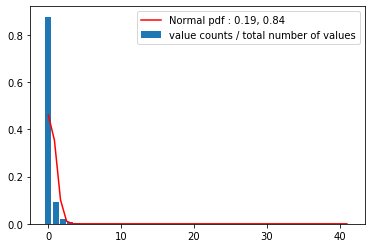


EU_Sales
---


<BarContainer object of 13 artists>

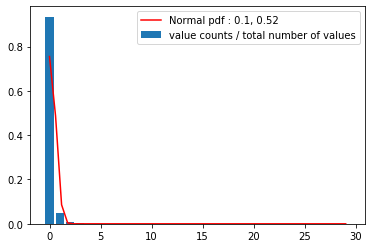


JP_Sales
---


<BarContainer object of 9 artists>

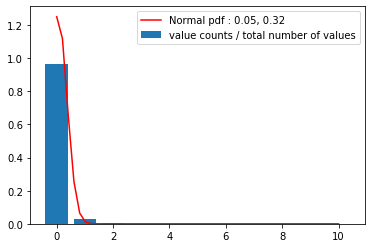


Other_Sales
---


<BarContainer object of 7 artists>

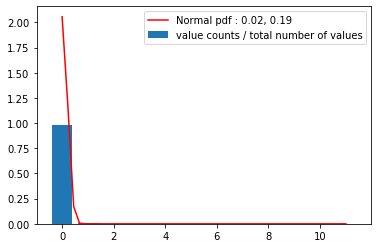


Global_Sales
---


<BarContainer object of 32 artists>

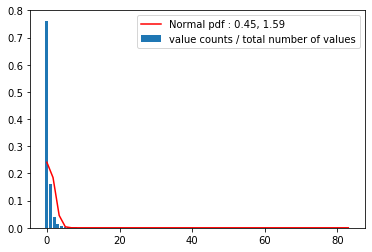

In [10]:
# imports/set up
import scipy.stats as stats
%matplotlib inline

# Only looking at number columns
nums_df = vg_df.select_dtypes(include=['int64', 'float64'])
rounded_nums_df = nums_df.round(decimals=0)
for col in rounded_nums_df.columns:
    # exlusions
    if col == ('Rank'):
        continue
    
    print('\n'+col+'\n---')
    
    # Normal distributions
    mu = rounded_nums_df[col].mean()
    sigma =  rounded_nums_df[col].std()
    x = np.linspace(rounded_nums_df[col].min(), rounded_nums_df[col].max())
    y = stats.norm.pdf(x, loc=mu, scale=sigma)

    # Plotting
    fig, ax = plt.subplots()
    ax.bar(rounded_nums_df[col].value_counts().sort_index().index, rounded_nums_df[col].value_counts().sort_index() / rounded_nums_df[col].value_counts().sort_index().sum(), label="value counts / total number of values")
    ax.plot(x,y, 'r', label=f"Normal pdf : {mu.round(2)}, {sigma.round(2)}")
    ax.legend()

    plt.show()

## Multivariate Analyses
* Correlation matrix (correlations)
  * Correlation is the measure of the linearity. It's sign represents wether the slope of a best fit line is positive or negative
  * 

via handbuilt
___________


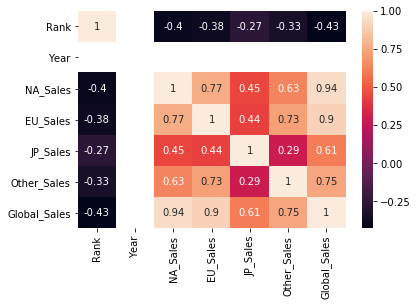


via builtin function. Note that the year column is allowed here, even though there are some non-existant values in that column
___________


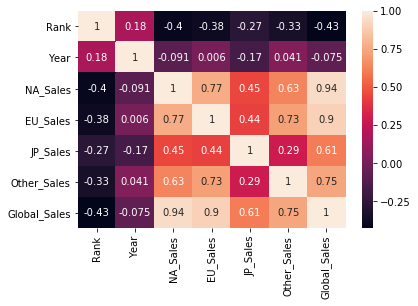

In [11]:
# imports
import math

# Handbuilt
print('via handbuilt\n___________')

corr_matrix = pd.DataFrame(columns = nums_df.columns, index = nums_df.columns, dtype = 'float64')

for col1 in nums_df.columns:
    for col2 in nums_df.columns:
        mu_col1 = nums_df[col1].mean()
        mu_col2 = nums_df[col2].mean()

        sig_col1 = nums_df[col1].std()
        sig_col2 = nums_df[col2].std()

        a = vg_df[col1] - mu_col1
        b = vg_df[col2] - mu_col2

        corr_matrix.at[col1,col2] = (sum(a*b)/(16598-1))/(sig_col1*sig_col2)

sns.heatmap(corr_matrix, annot = True)
plt.show()        

# Builtin (from pandas)
print('\nvia builtin function. Note that the year column is allowed here, even though there are some non-existant values in that column\n___________')

sns.heatmap(vg_df.corr(), annot = True)
plt.show()


In [2]:



# Note: rank is excluded from the pairplot because it is superceded by global sales.

nums_ex_rank_df = nums_df[1:]

# Pair plot

print('Pair plot\n__________')

#sns.pairplot(nums_ex_rank_df)
#plt.show()

# Simple scatter plots (also called a joint plot)

print('\nJoint plot\n__________')

for col1 in nums_ex_rank_df.columns:
    for col2 in nums_ex_rank_df.columns:
        sns.jointplot(x = col1, y = col2, data=nums_ex_rank_df)
plt.show()
        
# Hexagonal binning (combine all values that fall into each hexagon to form a more geometric representation)

for col1 in nums_ex_rank_df.columns:
    for col2 in nums_ex_rank_df.columns:
        sns.jointplot(x = col1, y = col2, data=nums_ex_rank_df, kind="hex", color="k")
plt.show()


NameError: name 'nums_df' is not defined

In [ ]:
nums_df[1:].head()